# **Data Loading**

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 
sns.set(style='white', color_codes=True)

In [6]:
data = pd.read_csv('ortho_knnnb.csv')
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


# **EDA**

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


**checking for data balance**

In [30]:
data['class'].value_counts()
#Note: dataset is not balanced. SMOTE might be necessary after checking the accuracy

Abnormal    210
Normal      100
Name: class, dtype: int64

**encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
clas = encoder.fit_transform(data['class'])

In [18]:
data_new = data.drop(columns=('class'))
data_new['class'] = clas.tolist()
data_new

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,1
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,1
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,1
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,1


**exploring and understanding relation between features**

In [25]:
data.columns.values

array(['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis',
       'class'], dtype=object)

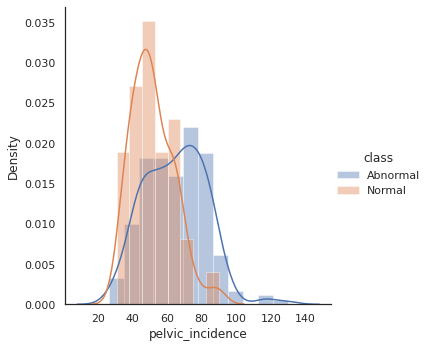

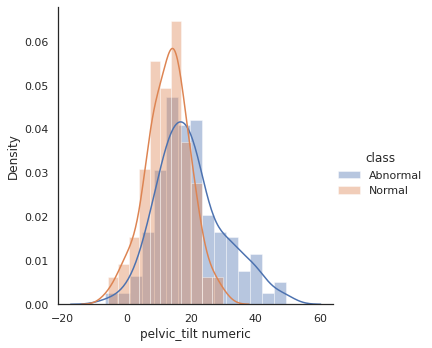

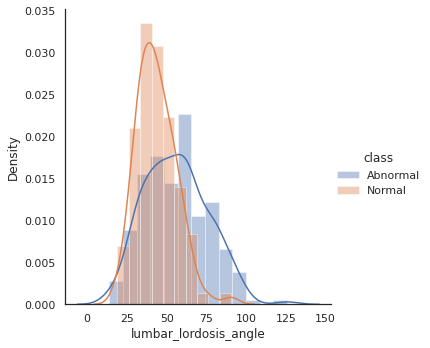

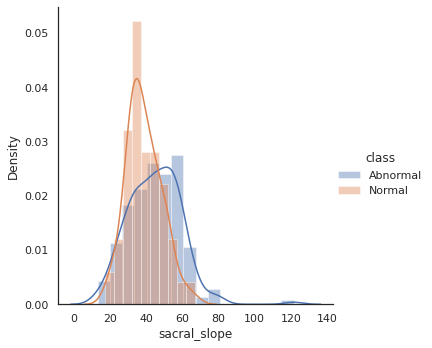

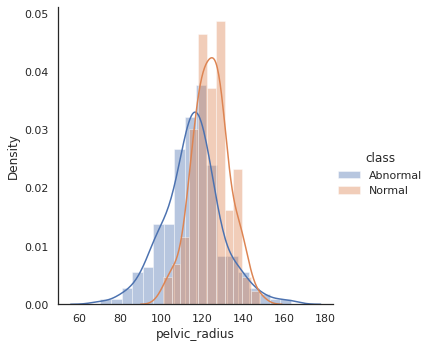

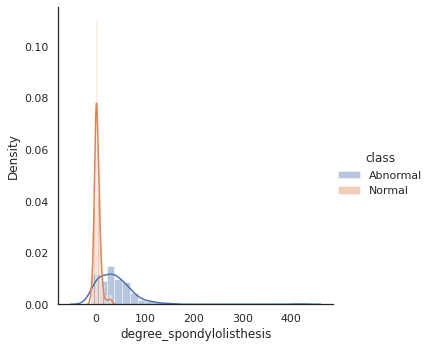

In [27]:
for name in data.columns.values[:-1]:
    sns.FacetGrid(data, hue="class", size=5).map(sns.distplot, name).add_legend()
plt.show()

**correlation map**

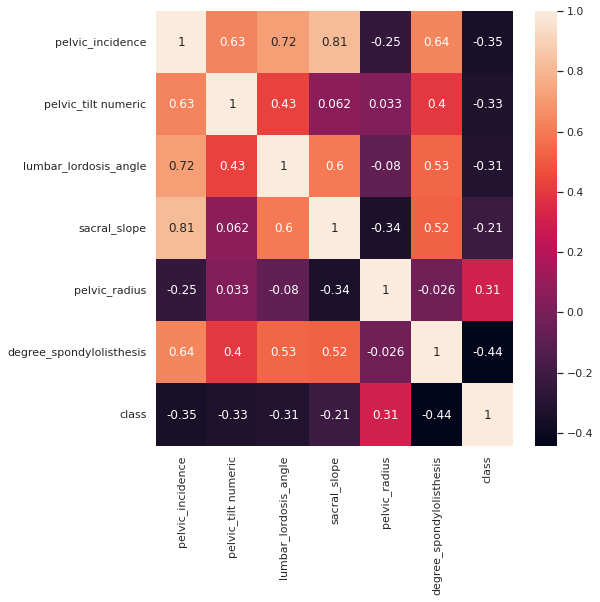

In [31]:
corr = data_new.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True)
plt.show()

#Note: the heat map shows that all features have similar (in range of 0.44 to 0.21) to the dependent variable

**checking for outliers**

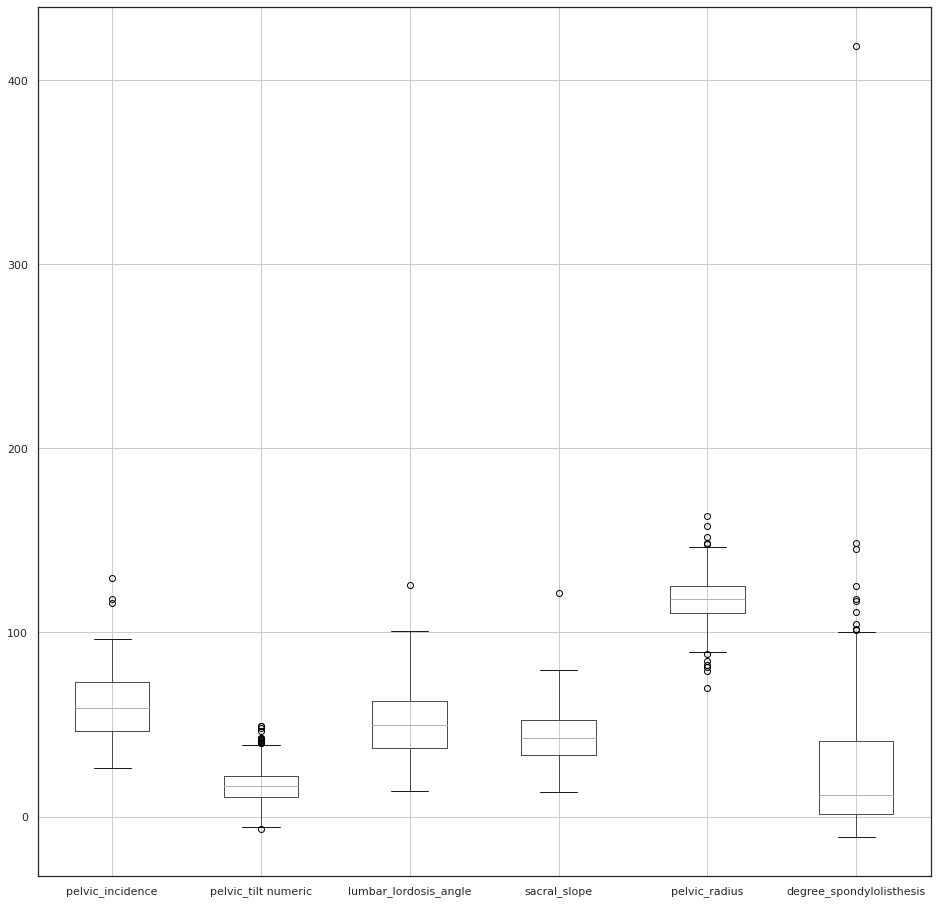

In [34]:
data.boxplot(column= ['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis'],figsize=(16,16), grid = True)

#Note: indepndent features have outliers. It might be necessary to mitigate after exploring the accuracy of the models 

**splitting the dataset in to taining and test**

In [35]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size = 0.2, random_state = 1 )

In [52]:
train_x = train.drop(columns=['class'])
train_y = train['class']
test_x = test.drop(columns=['class'])
test_y = test['class']

# **model training**

**KNN, k = 3**

In [53]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(train_x, train_y)

KNeighborsClassifier(n_neighbors=3)

In [55]:
prediction = classifier.predict(test_x)

In [58]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy: ", accuracy_score(test_y, prediction))
print("Confusion Matrix: ", confusion_matrix(test_y, prediction))
print("Classification Report: ", classification_report(test_y, prediction))

#Note: the metrics results show that the overall accuracy is 84%. But from classification report it can be seen that the accurcy for \
# abnormal results is only 75%. This could be due to unbalanced dataset

Accuracy:  0.8387096774193549
Confusion Matrix:  [[37  5]
 [ 5 15]]
Classification Report:                precision    recall  f1-score   support

    Abnormal       0.88      0.88      0.88        42
      Normal       0.75      0.75      0.75        20

    accuracy                           0.84        62
   macro avg       0.82      0.82      0.82        62
weighted avg       0.84      0.84      0.84        62



**KNN, k = 5**

In [70]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(train_x, train_y)

prediction = classifier.predict(test_x)

print("Accuracy: ", accuracy_score(test_y, prediction))
print("Confusion Matrix: ", confusion_matrix(test_y, prediction))
print("Classification Report: ", classification_report(test_y, prediction))


Accuracy:  0.8548387096774194
Confusion Matrix:  [[38  4]
 [ 5 15]]
Classification Report:                precision    recall  f1-score   support

    Abnormal       0.88      0.90      0.89        42
      Normal       0.79      0.75      0.77        20

    accuracy                           0.85        62
   macro avg       0.84      0.83      0.83        62
weighted avg       0.85      0.85      0.85        62



**KNN, k = 7**

In [71]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(train_x, train_y)

prediction = classifier.predict(test_x)

print("Accuracy: ", accuracy_score(test_y, prediction))
print("Confusion Matrix: ", confusion_matrix(test_y, prediction))
print("Classification Report: ", classification_report(test_y, prediction))

#Note: by increasing the k value from 3 to 5 in was possible to improve the model accuracy a little bit. But increasing the k above 5 makes no difference

Accuracy:  0.8548387096774194
Confusion Matrix:  [[38  4]
 [ 5 15]]
Classification Report:                precision    recall  f1-score   support

    Abnormal       0.88      0.90      0.89        42
      Normal       0.79      0.75      0.77        20

    accuracy                           0.85        62
   macro avg       0.84      0.83      0.83        62
weighted avg       0.85      0.85      0.85        62



**NAiVE BAYES**

In [65]:
from sklearn.naive_bayes import GaussianNB
nvclassifier = GaussianNB()
nvclassifier.fit(train_x, train_y)


GaussianNB()

In [76]:
prediction = nvclassifier.predict(test_x)

print("Accuracy: ", accuracy_score(test_y, prediction))
print("Confusion Matrix: ", confusion_matrix(test_y, prediction))
print("Classification Report: ", classification_report(test_y, prediction))


Accuracy:  0.8225806451612904
Confusion Matrix:  [[33  9]
 [ 2 18]]
Classification Report:                precision    recall  f1-score   support

    Abnormal       0.94      0.79      0.86        42
      Normal       0.67      0.90      0.77        20

    accuracy                           0.82        62
   macro avg       0.80      0.84      0.81        62
weighted avg       0.85      0.82      0.83        62



*Comments: 

1)  The Naive Bayes model results in lower overall accuracy compared with KNN. But the Naive Bayes model performance was good given the dataset was unbalnced and the model was able to handle that.

2) Implimentig SMOTE may improve the accuracy

# **Applying SMOTE**

In [74]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_train_smote, y_train_smote = smote.fit_resample (train_x, train_y)
from collections import Counter
print("Before SMOTE: ", Counter(train_y))
print("After SMOTE: ", Counter(y_train_smote))

Before SMOTE:  Counter({'Abnormal': 168, 'Normal': 80})
After SMOTE:  Counter({'Normal': 168, 'Abnormal': 168})


In [75]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train_smote, y_train_smote)

prediction = classifier.predict(test_x)

print("Accuracy: ", accuracy_score(test_y, prediction))
print("Confusion Matrix: ", confusion_matrix(test_y, prediction))
print("Classification Report: ", classification_report(test_y, prediction))

Accuracy:  0.7903225806451613
Confusion Matrix:  [[32 10]
 [ 3 17]]
Classification Report:                precision    recall  f1-score   support

    Abnormal       0.91      0.76      0.83        42
      Normal       0.63      0.85      0.72        20

    accuracy                           0.79        62
   macro avg       0.77      0.81      0.78        62
weighted avg       0.82      0.79      0.80        62



In [78]:
nvclassifier = GaussianNB()
nvclassifier.fit(x_train_smote, y_train_smote)

prediction = nvclassifier.predict(test_x)

print("Accuracy: ", accuracy_score(test_y, prediction))
print("Confusion Matrix: ", confusion_matrix(test_y, prediction))
print("Classification Report: ", classification_report(test_y, prediction))

Accuracy:  0.8225806451612904
Confusion Matrix:  [[33  9]
 [ 2 18]]
Classification Report:                precision    recall  f1-score   support

    Abnormal       0.94      0.79      0.86        42
      Normal       0.67      0.90      0.77        20

    accuracy                           0.82        62
   macro avg       0.80      0.84      0.81        62
weighted avg       0.85      0.82      0.83        62



Comment: SMOTE did not the accuracy in this particular dataset